/tmp/ipykernel_5960/3679429467.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-notebook")


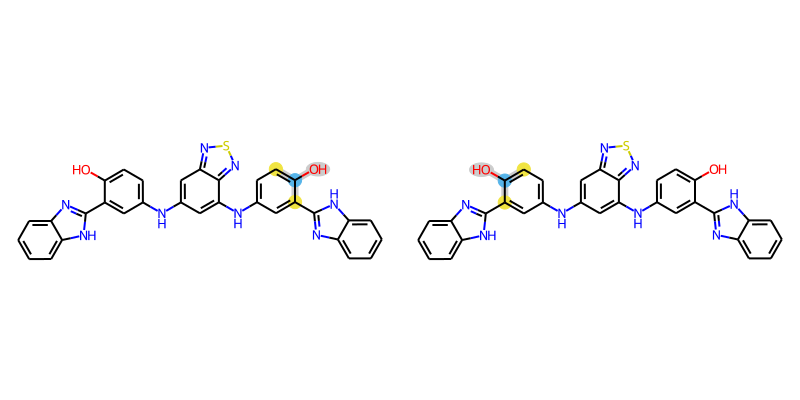

In [1]:
from rdkit import Chem
from rdkit.Chem import (
    AllChem,
    rdCoordGen,
)
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
from IPython.display import SVG

plt.style.use("seaborn-notebook")
IPythonConsole.ipython_useSVG = True  
from drawSmiles import *

Molecule = Chem.MolFromSmiles('Oc6ccc(Nc5cc(Nc3ccc(O)c(c2nc1ccccc1[nH]2)c3)c4nsnc4c5)cc6c8nc7ccccc7[nH]8')
rdCoordGen.AddCoords(Molecule)

Molecule

info = {}
fp = AllChem.GetMorganFingerprintAsBitVect(Molecule, radius=3, bitInfo=info, nBits=2048)

bit_number = 1607
#molecule, info, bit, size

draw_molecule_and_bit_info_grid(Molecule, info, bit_number, 400)
